<p style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;">Customer Segmentation 👨‍👨‍👦</p>


<center><img src= "https://raw.githubusercontent.com/jangid6/kaggleProjects-kernal-images/main/Customer-segmentation-analysis.png" alt ="Customer Segmentation" style='width:600px;'></center><br>


<h3>
    <li>Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.</li><br>
    <li>In business-to-consumer marketing, companies often segment customers according to demographics that include:

Age,Gender,Marital status,Location (urban, suburban, rural),Life stage (single, married, divorced, empty-nester, retired, etc.),Income.
</li><br>
 <li>Segmentation allows marketers to better tailor their marketing efforts to various audience subsets.</li>
</h3>

# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Importing Libraries</span>


In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan 
%matplotlib inline
import seaborn as sns
sns.set_context('notebook',font_scale=1.25)
from IPython.display import display, HTML
import scipy.stats
# import sklearn.metrics as metrics
from sklearn import metrics as metrics
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:60px 80px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Importing Data</span>


In [2]:
df = pd.read_csv('Mall_Customers_withNulls.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                15.0                    39.0
1           2    Male   21                15.0                    81.0
2           3  Female   20                16.0                     6.0
3           4  Female   23                16.0                    77.0
4           5  Female   31                17.0                    40.0

# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Basic EDA</span>


In [3]:
# checking the number of rows and columns

rows,columns = df.shape[0],df.shape[1]
display(HTML(f"<h3>  <b style='color:#800000;font-size:22px;'>Inference </b>:<ul><li>There are {rows} rows and {columns} columns.</li></ul></h3>"))

In [4]:
df.shape

(200, 5)

In [5]:
#checking the dtypes of the dataframe
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      199 non-null    float64
 4   Spending Score (1-100)  199 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [6]:
# renaming some columns for ease of working
df.rename(columns={'Annual Income (k$)':"Annual_Income",'Spending Score (1-100)':'CustomerSpendingScore'},inplace=True)
df.head()

CustomerID  Gender  Age  Annual_Income  CustomerSpendingScore
0           1    Male   19           15.0                   39.0
1           2    Male   21           15.0                   81.0
2           3  Female   20           16.0                    6.0
3           4  Female   23           16.0                   77.0
4           5  Female   31           17.0                   40.0

In [7]:
# checking for NaN instances
no_of_nan_values = df.isna().sum().sum()
display(HTML(f"<h3>  <b style='color:#800000;font-size:22px;'>Inference </b>:<ul><li>There are {no_of_nan_values} nan values.</li></ul></h3>"))

## Dealing with the nulls/Nan Values sith column mean value.

#### Step 1) Checking the totals rows

In [8]:
# Step 1) Checking the totals rows
df[df.isna().any(axis=1)]

CustomerID  Gender  Age  Annual_Income  CustomerSpendingScore
50          51  Female   49           42.0                    NaN
91          92    Male   18            NaN                   41.0

In [9]:
df.loc[[50,91]]

CustomerID  Gender  Age  Annual_Income  CustomerSpendingScore
50          51  Female   49           42.0                    NaN
91          92    Male   18            NaN                   41.0

In [10]:
df.mean(numeric_only=True)

CustomerID               100.500000
Age                       38.850000
Annual_Income             60.567839
CustomerSpendingScore     50.190955
dtype: float64

#### Step 2) Replacing Nan/null Values with Population Mean

In [11]:
df = df.fillna(df.mean(numeric_only=True))
df.to_excel(r'mall.xlsx', index=False)

In [12]:
df.loc[[50,91]] #you can see row with index 50 & 91 had NaN values which is being replace with the mean of the population.

CustomerID  Gender  Age  Annual_Income  CustomerSpendingScore
50          51  Female   49      42.000000              50.190955
91          92    Male   18      60.567839              41.000000

In [13]:
# checking for NaN instances
no_of_nan_values = df.isna().sum().sum()
display(HTML(f"<h3>  <b style='color:#800000;font-size:22px;'>Inference </b>:<ul><li>There are {no_of_nan_values} nan values.</li></ul></h3>"))

In [14]:
# checking for duplicate instances
no_of_duplicates = df.duplicated().sum()
display(HTML(f"<h3>  <b style='color:#800000;font-size:22px;'>Inference </b>:<ul><li>There are {no_of_duplicates} duplicate values.</li></ul></h3>"))

In [15]:
# Checking the discriptive statistics about the data
df.describe()

CustomerID         Age  Annual_Income  CustomerSpendingScore
count  200.000000  200.000000     200.000000             200.000000
mean   100.500000   38.850000      60.567839              50.190955
std     57.879185   13.969007      26.264487              25.823205
min      1.000000   18.000000      15.000000               1.000000
25%     50.750000   28.750000      41.500000              34.750000
50%    100.500000   36.000000      61.500000              50.000000
75%    150.250000   49.000000      78.000000              73.000000
max    200.000000   70.000000     137.000000              99.000000

<h3> <b style='color:#800000;font-size:22px;'>Inference from 5 number theory</b>:
    <ul>
    <li>Age is Positively Skewed (Right skewed).</li><br>
    <li>Annual Income is Roughly Normally Distributed.</li><br>
    <li>Customer Spending score is also Roughly Normally Distributed.</li><br>
    </ul>
</h3>


# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Now Let’s see some of widely used hypothesis testing type :-
<h3> 
    <ul>
    <li>T Test (Student T test).</li><br>
        <li>Chi-Square Test</li><br>
        <li>Pearon's Test </li><br>
        <li>Anova Test & Levene Test ( TEST OF VARIANCE )</li><br>
    </ul>
</h3>
</span>


# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Univariate Analysis</span>


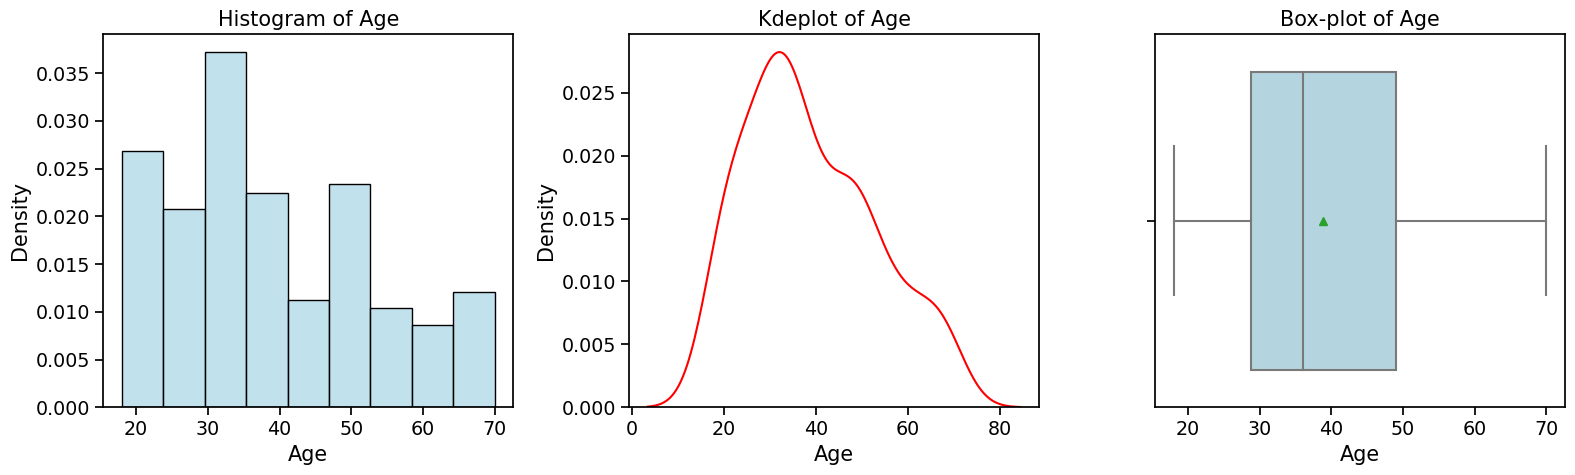

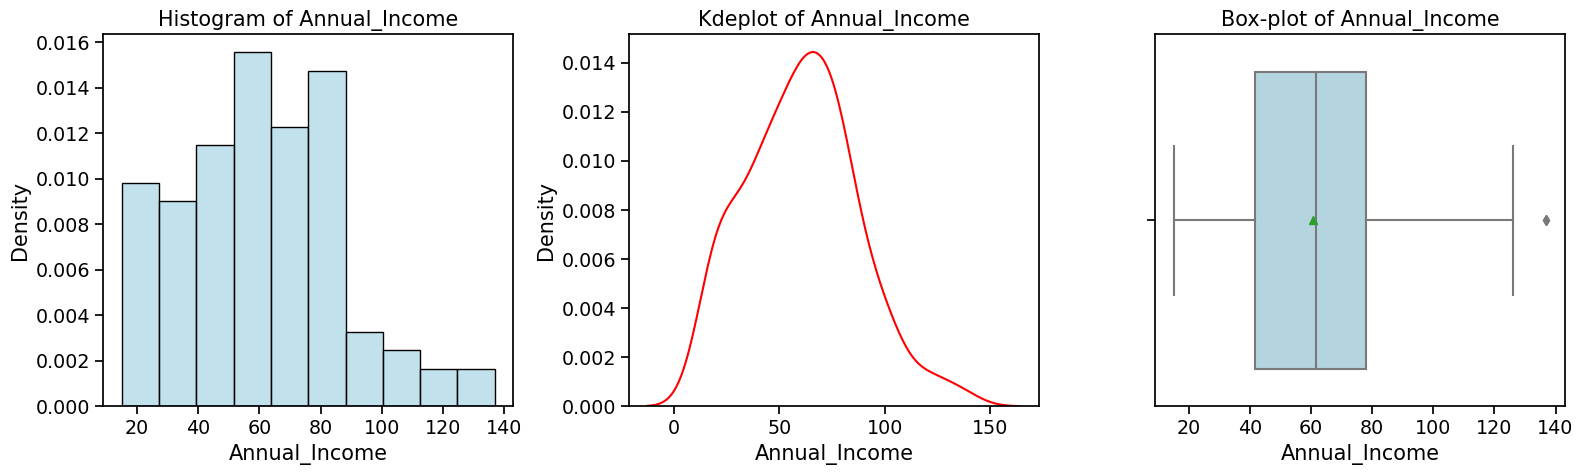

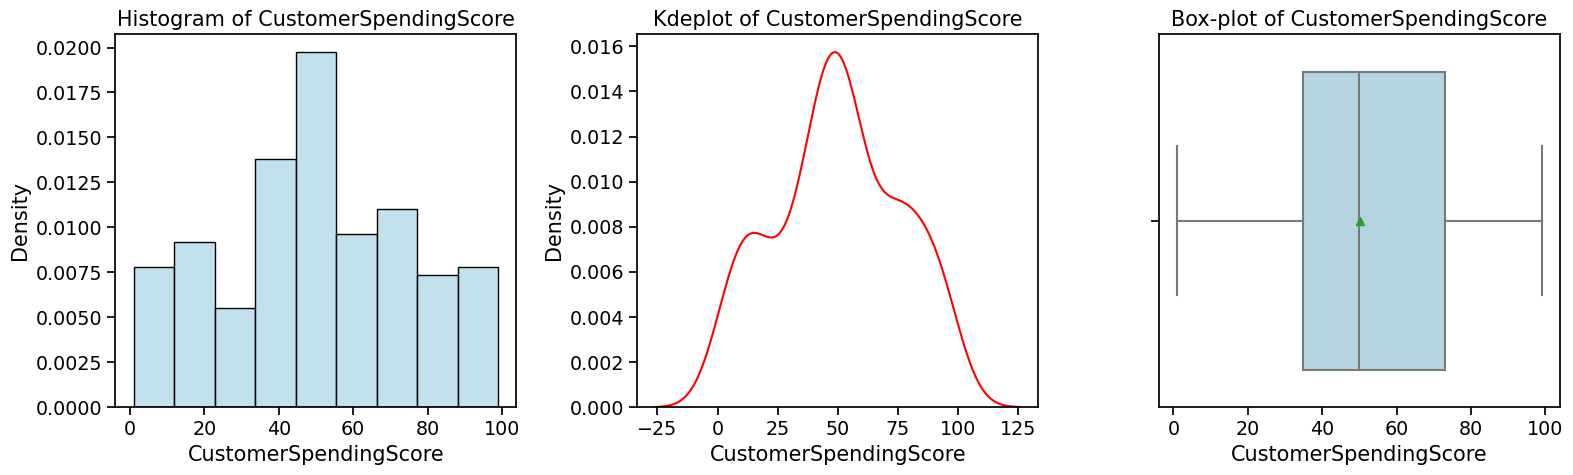

In [16]:
imp_numerical_cols = ['Age','Annual_Income','CustomerSpendingScore']
for i,col in enumerate(imp_numerical_cols):
    text="<center><h3><b  style='color:black'>" + f"Distribution of</b> <b style='color:#800080'> {col}"+ "</b></h3><hr></center>"
    display(HTML(text))
    plt.figure(figsize=(16,5))
    bins='auto'
    plt.subplot(1,3,1)
    sns.histplot(data=df,x=col,stat='density',bins=bins,color='lightblue')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,3,2)
    sns.kdeplot(data=df,x=col,color='red')
    plt.title(f'Kdeplot of {col}',size=15)
    
    plt.subplot(1,3,3)
    sns.boxplot(data=df,x=col,color='lightblue',showmeans=True)
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

[Text(0, -25, '112 (56%)'), Text(0, -25, '88 (44%)')]

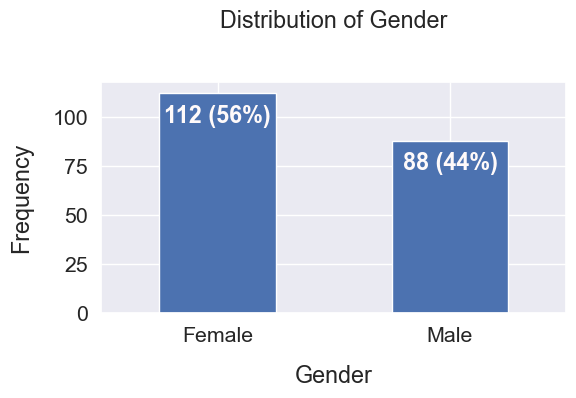

In [17]:
# df.plot as bar
sns.set(font_scale=1.4)
ax = df['Gender'].value_counts().plot(kind='bar', figsize =(6, 3), rot=0 , stacked=True)
plt.xlabel("Gender", labelpad = 14)
plt.ylabel("Frequency", labelpad = 14)
plt.title("Distribution of Gender", y = 1.2);
abs_values = df['Gender'].value_counts(ascending=False)
rel_values = df['Gender'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(ax.containers[0],color='snow',fontweight='bold',labels=lbls,padding = -25)


In [18]:
print("Step 1: State the null and alternative hypothesis. \n\nFirst, we’ll state the null and alternative hypotheses:")


print("\nH0: μ1 = μ2 (the two population means are equal) \nH1: μ1 ≠ μ2 (the two population means are not equal) ")

male_Agedata = df.Age[df.Gender == 'Male']
female_Agedata = df.Age[df.Gender == 'Female']

male_mean = round(np.mean(male_Agedata),2)
female_mean = round(np.mean(female_Agedata),2)

print("\nMale mean Age value:",male_mean)
print("Female mean Age value:",female_mean)

#find variance for each group
male_variance = round(np.var(male_Agedata),1)
female_variance = round(np.var(female_Agedata),1)

var_of_male_to_female = round(male_variance/female_variance,1)

print("\nVariance of Male Age is {a} \nVariance of Female Age is {b}".format(a = male_variance,b = female_variance ))
print("\nThe ratio of the larger sample variance to the smaller sample variance is {a}/{b} ,{c} which is less than 4. This means we can assume that population variance is equal".format(a = male_variance,b = female_variance,c = var_of_male_to_female))

male_std = round(np.std(male_Agedata),2)
female_std = round(np.std(female_Agedata),2)

print("\nMale std value:",male_std)
print("Female std value:",female_std)

Step 1: State the null and alternative hypothesis. 

First, we’ll state the null and alternative hypotheses:

H0: μ1 = μ2 (the two population means are equal) 
H1: μ1 ≠ μ2 (the two population means are not equal) 

Male mean Age value: 39.81
Female mean Age value: 38.1

Variance of Male Age is 238.0 
Variance of Female Age is 158.4

The ratio of the larger sample variance to the smaller sample variance is 238.0/158.4 ,1.5 which is less than 4. This means we can assume that population variance is equal

Male std value: 15.43
Female std value: 12.59


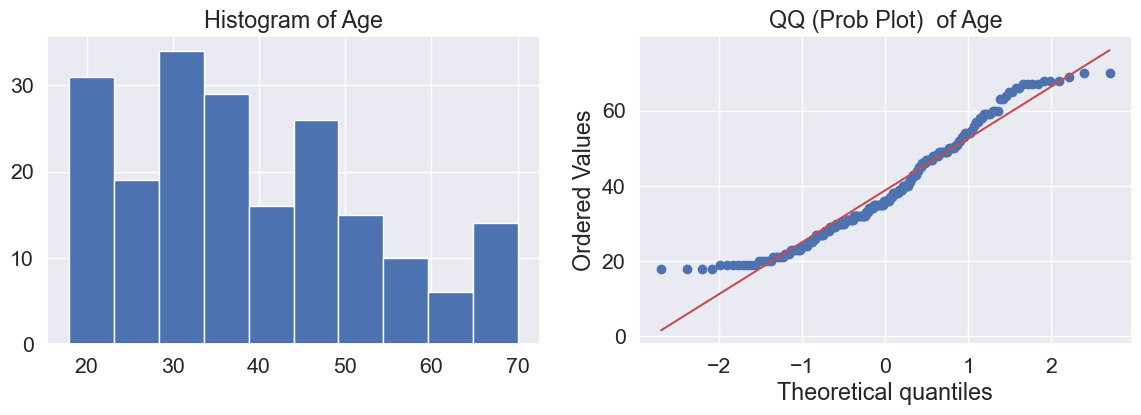

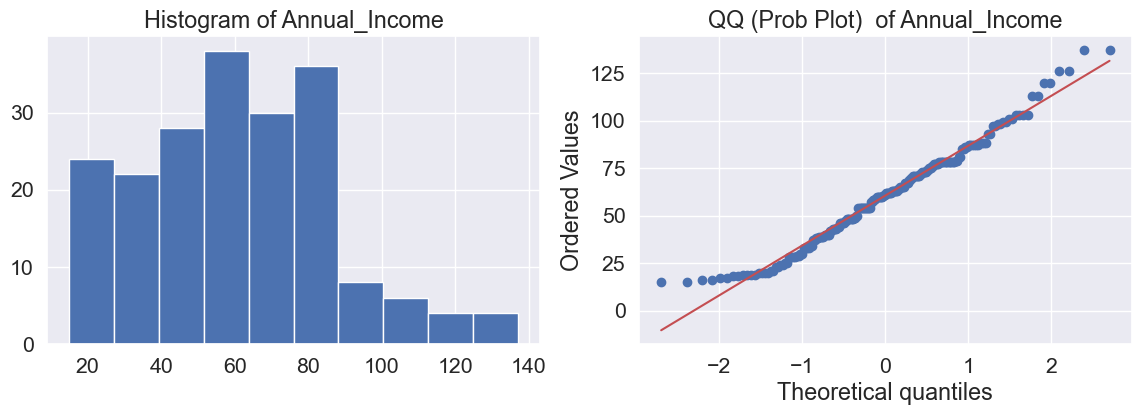

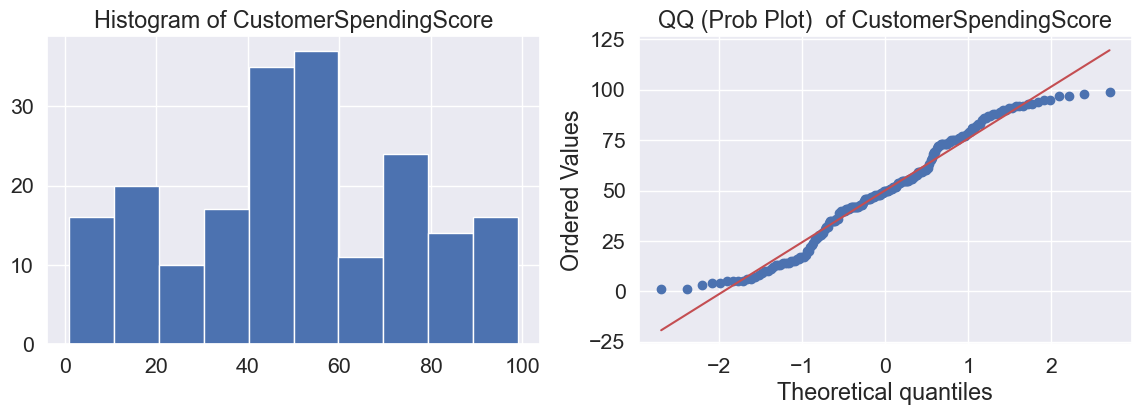

In [19]:
import statsmodels.api as statmod
import matplotlib.pyplot as plt
import scipy.stats as stat #probability plot
import pylab

# create Q-Q plot 

# df.columns
qq_plot_colsdict = {
    'Age' : 'Age'
    ,'Annual_Income' : 'Annual_Income'
    ,'CustomerSpendingScore' : 'CustomerSpendingScore'
}
def plot_data(df,feature):
    
    text="<center><h3><b  style='color:black'>" + f"Distribution of</b> <b style='color:#800080'> {feature}"+ "</b></h3><hr></center>"
    display(HTML(text))
    plt.figure(figsize=(14,4))
    
    plt.subplot(1,2,1)  #1st plot
    # displaying the title
    plt.title("Histogram of "+ feature)
    df[feature].hist()

    plt.subplot(1,2,2)  #2nd plot
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title("QQ (Prob Plot)  of "+ feature)
    
#     statmod.qqplot(male_Agedata)
#     statmod.qqplot(female_Agedata)
    
    plt.show()
    
for feature in qq_plot_colsdict:
    plot_data(df,feature)

# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">T-Test</span>

<b> Observed Sample contains</b>

>  One Categorical & One Continous(Numerical)

>  Means from a continous variable ( for eg Age here ) taken from two or more groups

# Step 1: State the null and alternative hypothesis:
<ul>First, we’ll state the null and alternative hypotheses:
    <li><h6> H0: μ1 = μ2 (The two population means of Male & Female are equal).</h6></li>
    <li><h6> H1: μ1 ≠ μ2 (The two population means of Male & Female are not equal).</h6></li>
</ul>

# Step 2:  Calculate the t-value. & p-value:

In [20]:
from scipy.stats import ttest_ind
ttest,pval_ttest = ttest_ind(male_Agedata,female_Agedata,equal_var=True) #Independent sample t-test - Argument: Sample1, Sample2
ttest,pval_ttest = round(ttest,2),round(pval_ttest,2)
print("\nt-test statistic : ",ttest)
print("p-value : ",pval_ttest)


t-test statistic :  0.86
p-value :  0.39


In [21]:
if pval_ttest < 0.05:
    print("\nWe reject null hypothesis,i.e the two population means are equal, Since p-value is smaller than 0.05")
else:
    print("\nWe fail to reject null hypothesis, Since p-value is greater than 0.05")
    print("\nThis means we do not have sufficient evidence to say that the mean weight of Male & Female is differnt.")


We fail to reject null hypothesis, Since p-value is greater than 0.05

This means we do not have sufficient evidence to say that the mean weight of Male & Female is differnt.


<h3> <b style='color:#800000;font-size:22px;'>Inference of T-test</b>:
    <span></span>
    <ul>
        <li>Since the p-value > 0.05 we fail to reject the H0 hypothesis</li>
        <li>This means we do not have sufficient evidence to say that the population mean of Male & Female Age is different</li>
    </ul>
</h3>


# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 310px">Bivariate Analysis</span>



# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Chi Square Test  </span>

Chi square is a non-parametric test that is used to show association between two qualitative variables (like gender and EyeColor) ;

<b> Observed Sample contains</b>

>  Both Variable are Categorial Data

>  Both Variables are qualitative variables


### Contingency tables (also called crosstabs or two-way tables) 

In statistics, a contingency table is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables

If two categorical variables are present, a crosstab is obtained by entering the values of the variables in the table. For the first variable, the values are plotted from left to right, for the second variable from top to bottom. The individual cells are then filled with either the absolute or the relative frequency.

## <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">1 : Checking for Association between Gender and Customer Spending Score </span>

* <b> Stating the hypothesis:</b>

>  **H0:Gender and Customer Spending Score are independent.**

>  **H1:Customer Spending Score depends on Gender.**

In [22]:
# cont_table = pd.crosstab(df['Gender'],df['CustomerScore'])
cont_table = pd.crosstab(df['Gender'],df['Age'])

cont_table

Age     18  19  20  21  22  23  24  25  26  27  ...  59  60  63  64  65  66  \
Gender                                          ...                           
Female   1   2   2   4   2   6   2   1   0   4  ...   0   2   1   0   1   1   
Male     3   6   3   1   1   0   2   2   2   2  ...   4   1   1   1   1   1   

Age     67  68  69  70  
Gender                  
Female   1   2   0   0  
Male     3   1   1   2  

[2 rows x 51 columns]

<h3> <b style='color:#800000;font-size:22px;'>Inference of Contingency tables ( crosstabs ) </b>:
<!--     <ul>
        <li>Since the p-value > 0.05 we fail to reject the H0 hypothesis</li>
        <li>Null Hypothesis sustains i.e Gender and Customer Spending Score are independent.</li>
    </ul> -->
</h3>

> **Frequency distribution for Each Customer Score (Quantitative Variable) as a Qualitative Variable (Another Category against Gender)**

In [23]:
from scipy.stats import chi2_contingency
x_sq,p_val_ChiSq,dof_chisq,expectedvalue_chisq = chi2_contingency(cont_table,correction=True)
print("𝜒2 value : ",x_sq)
print(f"p-value for the test :  :{p_val_ChiSq:.4f}")
print("Degree of Freedom  : ",dof_chisq)

𝜒2 value :  62.60286655984709
p-value for the test :  :0.1088
Degree of Freedom  :  50


<h3> <b style='color:#800000;font-size:22px;'>Inference of Chi-Square Test Between Gender & Customer Spending Score </b>:
    <ul>
        <li>Since the p-value > 0.05 we fail to reject the H0 hypothesis</li>
        <li>Null Hypothesis sustains i.e Gender and Customer Spending Score are independent.</li>
    </ul>
</h3>

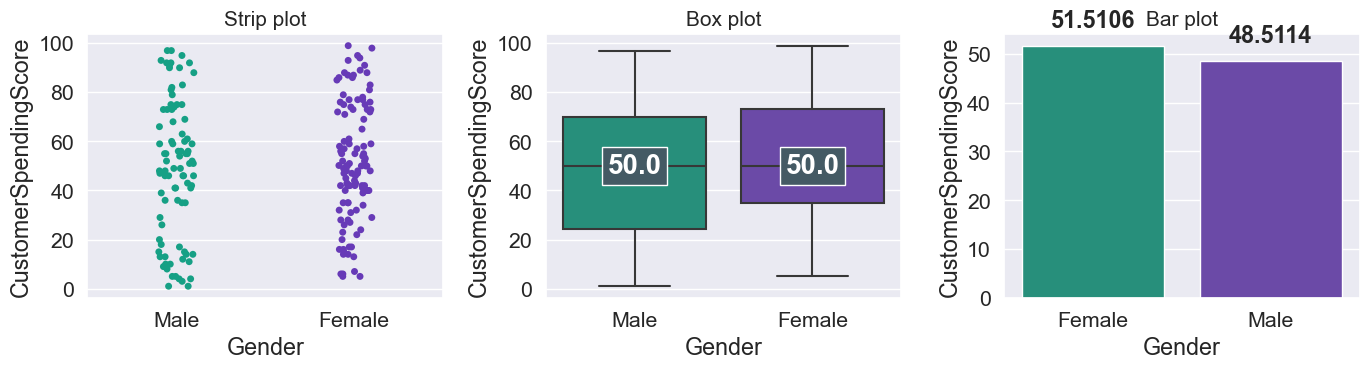

In [24]:
fig=plt.figure(figsize=(14,4))
text="<center><h3><b  style='color:black'>" + f"Association between </b> <b style='color:#800080'> Gender and Spending Score"+ "</b></h3><hr></center>"
display(HTML(text))

#barplot
ax=plt.subplot(1,3,3)
temp=df.groupby('Gender')['CustomerSpendingScore'].mean().reset_index()
ax = sns.barplot(data=temp,x='Gender',y='CustomerSpendingScore',palette=['#16A085','#673AB7']);
ax.bar_label(ax.containers[0],fontweight='bold',padding = 10)
plt.title("Bar plot",fontsize=15)

#Box Plot
ax=plt.subplot(1,3,2)
box_plot = sns.boxplot(data=df,x='Gender',y='CustomerSpendingScore',palette=['#16A085','#673AB7']);
plt.title("Box plot",fontsize=15)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=20,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

#Strip Plot
ax=plt.subplot(1,3,1)
sns.stripplot(data=df,x='Gender',y='CustomerSpendingScore',palette=['#16A085','#673AB7']);
plt.title("Strip plot",fontsize=15)

plt.tight_layout()
plt.show()

<h3> <b style='color:#800000;font-size:22px;'>Inference </b>:
    <ul>
    <li>The above visuals strengthen our claim that Gender has no impact on Customer Spending Score.</li>
    </ul>
</h3>

## <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">2 : Checking for Association between Gender and Annual Income </span>

* <b> Stating the hypothesis:</b>

>  **H0:Gender and Annual Income  are independent.**

>  **H1:Annual Income depends on Gender.**

In [25]:
from scipy.stats import chi2_contingency
cont_table_ai = pd.crosstab(df['Gender'],df['Annual_Income'])
cont_table_ai

Annual_Income  15.0   16.0   17.0   18.0   19.0   20.0   21.0   23.0   24.0   \
Gender                                                                         
Female             0      2      2      2      2      2      1      1      0   
Male               2      0      0      0      2      2      1      1      2   

Annual_Income  25.0   ...  93.0   97.0   98.0   99.0   101.0  103.0  113.0  \
Gender                ...                                                    
Female             1  ...      0      2      1      1      1      4      1   
Male               1  ...      2      0      1      1      1      0      1   

Annual_Income  120.0  126.0  137.0  
Gender                              
Female             2      1      0  
Male               0      1      2  

[2 rows x 65 columns]

In [26]:
x_sq_ai,p_val_ChiSq_ai,dof_chisq_ai,expectedvalue_chisq_ai = chi2_contingency(cont_table_ai,correction=True)
print("𝜒2 value : ",x_sq_ai)
print(f"p-value for the test :  :{p_val_ChiSq_ai:.4f}")
print("Degree of Freedom  : ",dof_chisq_ai)

𝜒2 value :  68.77705627705629
p-value for the test :  :0.3189
Degree of Freedom  :  64


<h3> <b style='color:#800000;font-size:22px;'>Inference of Chi-Square Test Between Gender & Annual Income </b>:
    <ul>
        <li>Since the p-value > 0.05 we fail to reject the H0 hypothesis</li>
        <li>Null Hypothesis sustains i.e Gender and Annual Income are independent.</li>
    </ul>
</h3>

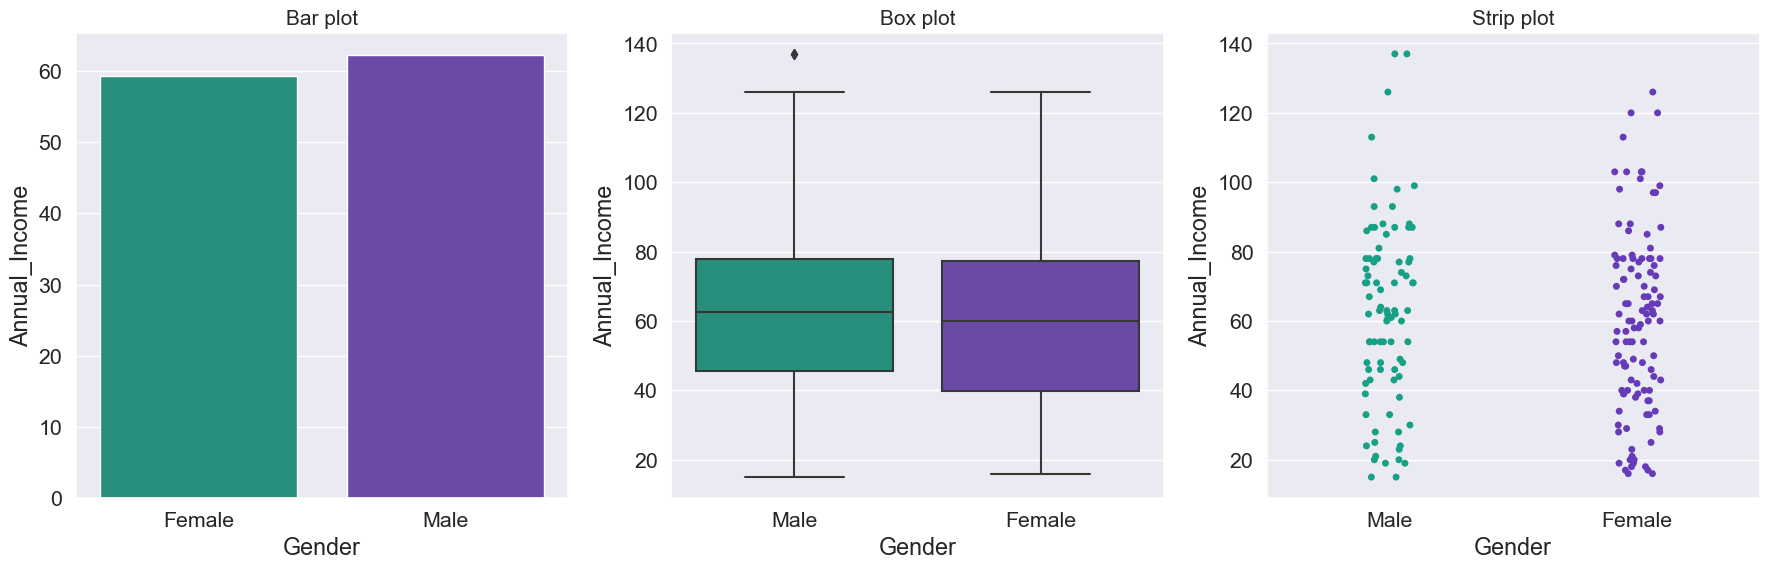

In [27]:
fig=plt.figure(figsize=(18,6))
text="<center><h3><b  style='color:black'>" + f"Association between </b> <b style='color:#800080'> Gender and Annual_Income"+ "</b></h3><hr></center>"
display(HTML(text))

ax=plt.subplot(1,3,1)
temp=df.groupby('Gender')['Annual_Income'].mean().reset_index()
sns.barplot(data=temp,x='Gender',y='Annual_Income',palette=['#16A085','#673AB7']);
plt.title("Bar plot",fontsize=15)

ax=plt.subplot(1,3,2)
sns.boxplot(data=df,x='Gender',y='Annual_Income',palette=['#16A085','#673AB7']);
plt.title("Box plot",fontsize=15)

ax=plt.subplot(1,3,3)
sns.stripplot(data=df,x='Gender',y='Annual_Income',palette=['#16A085','#673AB7']);
plt.title("Strip plot",fontsize=15)

plt.tight_layout()

<h3> <b style='color:#800000;font-size:22px;'>Inference </b>:
    <ul>
    <li>The above visuals strengthen our claim that Gender has no impact on Annual Income.</li>
    </ul>
</h3>

# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Pearson's chi-squared test</span>

<b> Observed Sample Data contains</b>

>  Both Variables are Continous (Numerical)

## <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Checking for Association between Annual Income and Customer Spending Score</span>

* <b>Stating the hypothesis:</b>

> <b> H0:The Customer Spending Score and Annual Income are independent.</b>

> <b>H1:The Customer Spending Score depends on Annual Income.</b>

In [28]:
from scipy.stats import pearsonr
p_value,_ = pearsonr(df['Annual_Income'],df['CustomerSpendingScore'])
print(f"p-value for the test:{p_value:.4f}")

p-value for the test:0.0100


<h3> <b style='color:#800000;font-size:22px;'>Inference of Pearson's Corelation Test Between Customer Spending Score & Annual Income </b>:
    <ul>
        <li>Since the p-value < 0.05 we reject the H0 hypothesis. </li>
        <li>we can reject the null hypothesis and conclude that we have sufficient evidence to say that the alternative hypothesis is true : Annual Income and Spending Score are correlated.</li>
    </ul>
</h3>

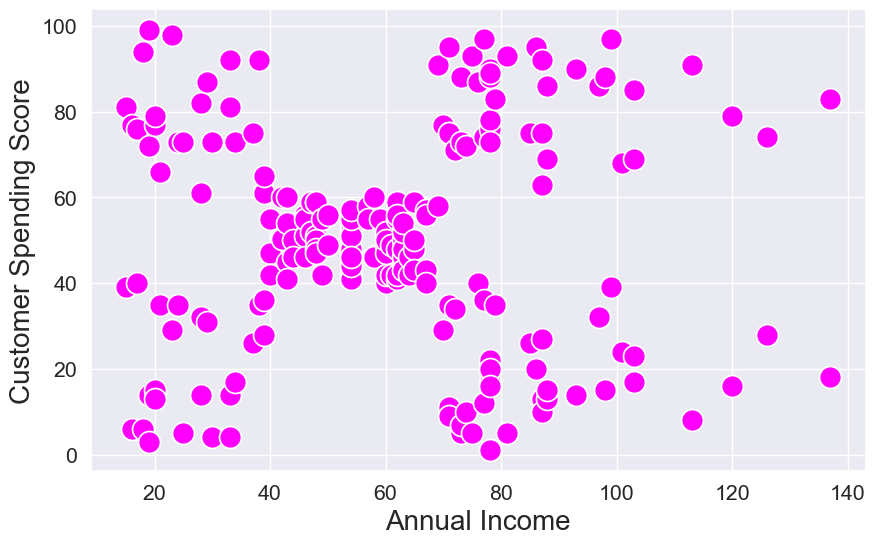

In [29]:
plt.figure(figsize=(10,6))
text="<center><h3><b  style='color:black'>" + f"Association between </b> <b style='color:#800080'> Annual_Income and Spending Score"+ "</b></h3><hr></center>"
display(HTML(text))
sns.scatterplot(data=df,x='Annual_Income',y='CustomerSpendingScore',s=250,color='#FF00FF');
plt.xlabel("Annual Income",fontsize=20)
plt.ylabel("Customer Spending Score",fontsize=20);

<h3> <b style='color:#800000;font-size:22px;'>Inference </b>:
    <ul>
    <li>The above visual gives me the impression that there is small positive correlation between Annual Income and Spending Score.</li>
    </ul>
</h3>

# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">ANOVA & LEVENE TEST</span>

<b> Observed Sample Data contains</b>

>  About one categorical independent variable and one quantitative dependent variable

>  The independent variable should have at least three levels (i.e. at least three different groups or categories)


In [30]:
# binning the Age feature 

bins = [0,20,40,60,80]
labels = np.arange(0,len(bins)-1)
# labels
df['binned_Age']=pd.cut(df['Age'],bins,labels=labels)
df.head(n = 10)

CustomerID  Gender  Age  Annual_Income  CustomerSpendingScore binned_Age
0           1    Male   19           15.0                   39.0          0
1           2    Male   21           15.0                   81.0          1
2           3  Female   20           16.0                    6.0          0
3           4  Female   23           16.0                   77.0          1
4           5  Female   31           17.0                   40.0          1
5           6  Female   22           17.0                   76.0          1
6           7  Female   35           18.0                    6.0          1
7           8  Female   23           18.0                   94.0          1
8           9    Male   64           19.0                    3.0          3
9          10  Female   30           19.0                   72.0          1

In [31]:
df['binned_Age'].value_counts()
dfnew = pd.DataFrame(df['binned_Age'].value_counts().sort_index())
dfnew

binned_Age
0          17
1         105
2          61
3          17

In [32]:
df['binned_Age'].value_counts().sort_index()

0     17
1    105
2     61
3     17
Name: binned_Age, dtype: int64

<AxesSubplot:xlabel='binned_Age', ylabel='count'>

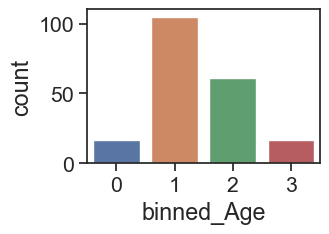

In [33]:
sns.set_style('ticks')
plt.figure(figsize=(3,2))
sns.countplot(x = 'binned_Age',data = df,dodge=True,ax=None)

Before we can conduct a one-way ANOVA, we must first check to make sure that three assumptions are met.

1. Normality – Each sample was drawn from a normally distributed population.

2. Equal Variances – The variances of the populations that the samples come from are equal.

3. Independence – The observations in each group are independent of each other and the observations within groups were obtained by a random sample.

To check this assumption, we can use two approaches:
1. Check the assumption visually using histograms or Q-Q plots.
2. Check the assumption using formal statistical tests like Levene,Shapiro-Wilk, Kolmogorov-Smironov, 

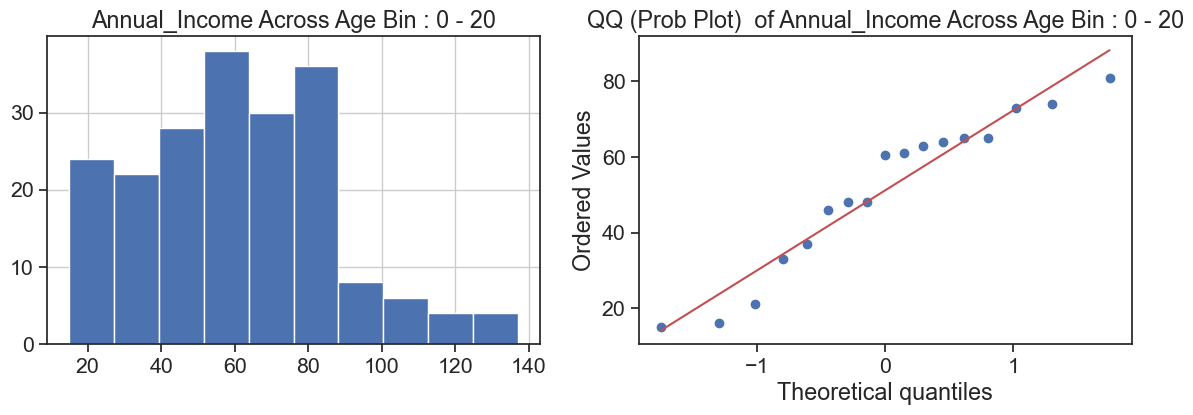

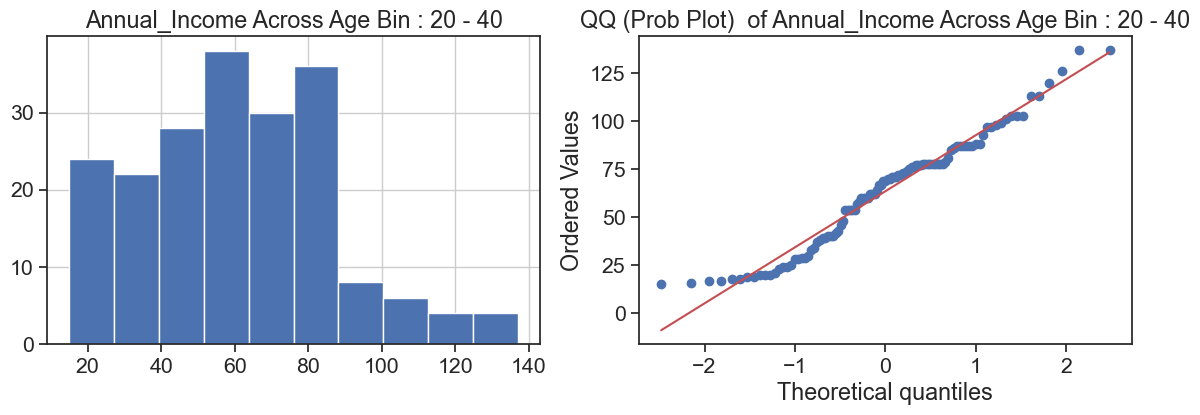

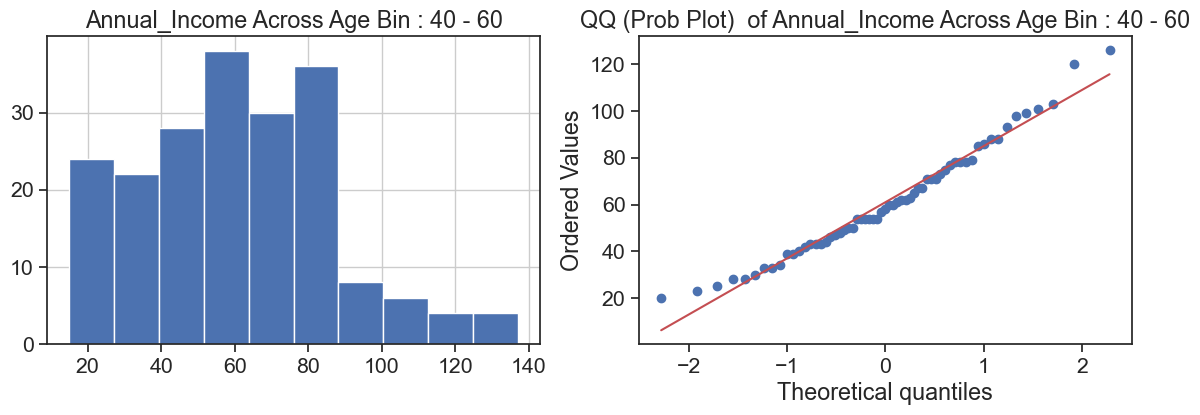

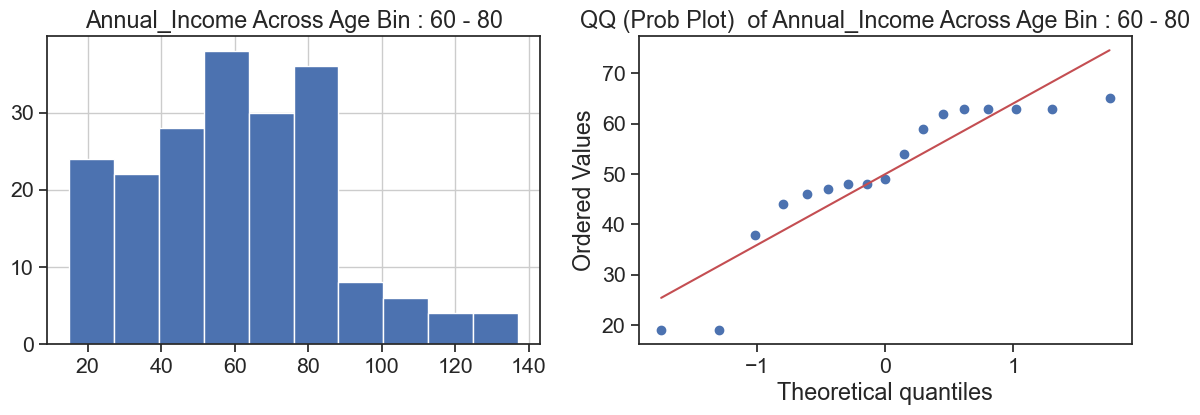

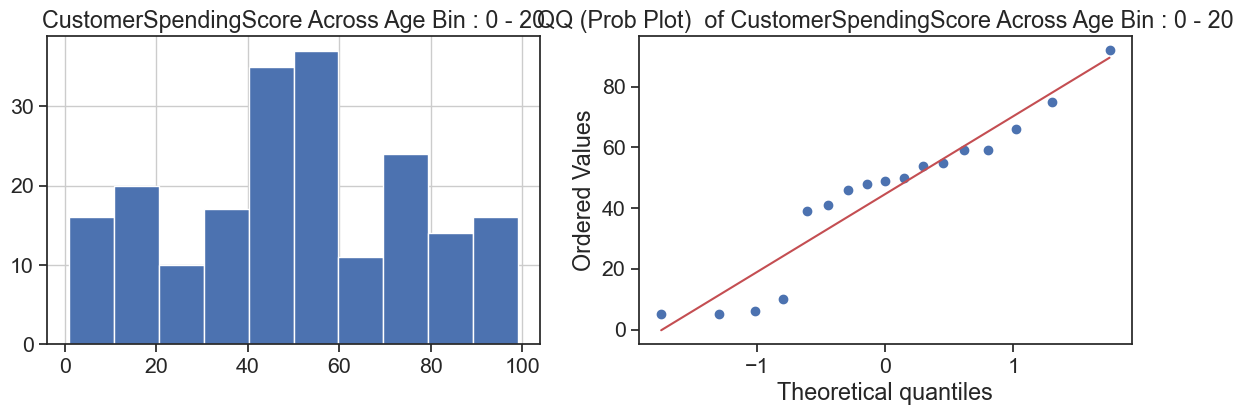

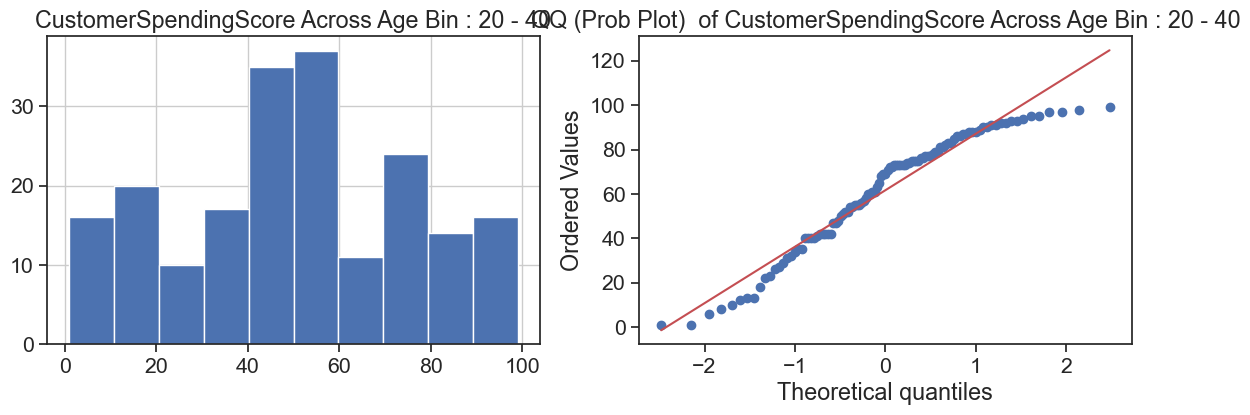

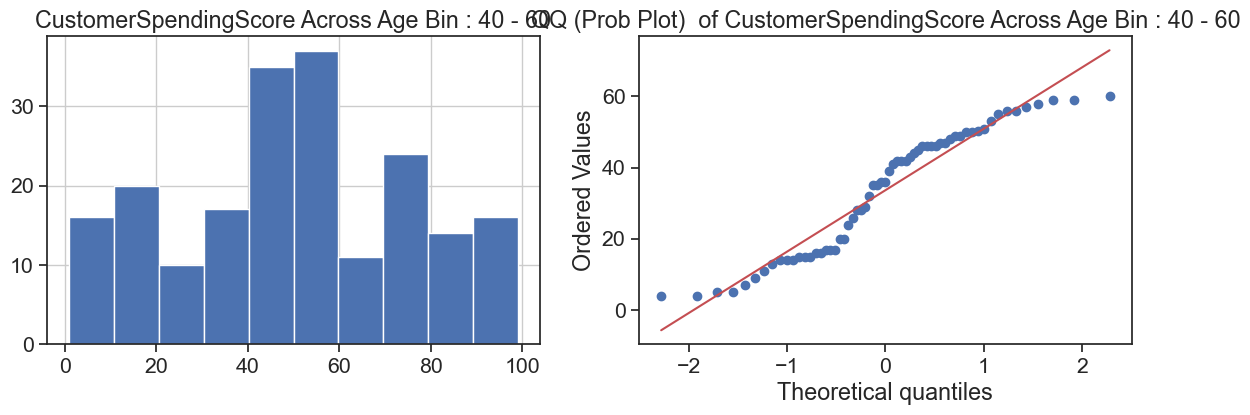

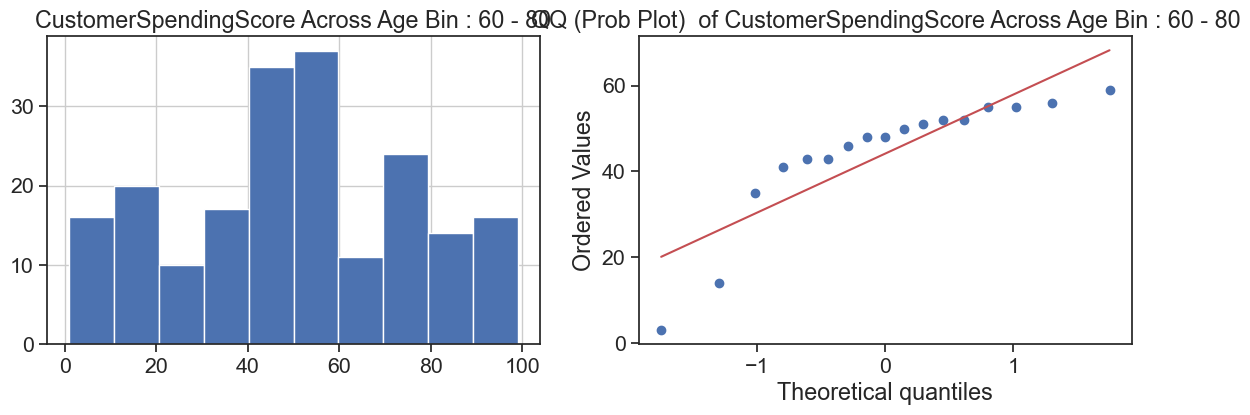

In [34]:
import statsmodels.api as statmod
import matplotlib.pyplot as plt
import scipy.stats as stat #probability plot
import pylab

# create Q-Q plot 

# df.columns
qq_plot_colsdict = {
#      'Age'           : 'Age',
    'Annual_Income' : 'Annual_Income',
    'CustomerSpendingScore' : 'CustomerSpendingScore'
}
def plot_data(df,feature):
    for B in labels:
        title  = f'{feature} Across Age Bin : {bins[B]} - {bins[B + 1]}'
#         print(title)
        text="<center><h3><b  style='color:black'>" + f"Distribution of</b> <b style='color:#800080'> {title}"+ "</b></h3><hr></center>"
        display(HTML(text))

        plt.figure(figsize=(14,4))

        plt.subplot(1,2,1)  #1st plot
        # displaying the title
        plt.title(title)
        df[feature].hist()

        plt.subplot(1,2,2)  #2nd plot

        stat.probplot(df[df['binned_Age'] == B][feature], dist='norm', plot=pylab)
        plt.title("QQ (Prob Plot)  of "+ str(title))
    
#     statmod.qqplot(male_Agedata)
#     statmod.qqplot(female_Agedata)
    
        plt.show()
    
for feature in qq_plot_colsdict:
    plot_data(df,feature)

Customer Score Across Age Bin : 0 - 20
Mean is :  44.64705882352941
Variance is : 598.2283737024221
Std D is :  24.4587075231383


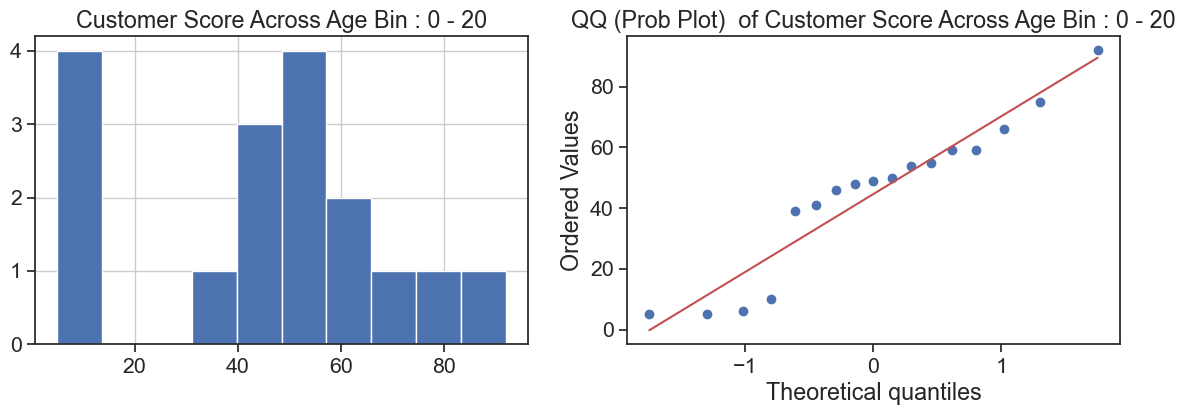

Customer Score Across Age Bin : 20 - 40
Mean is :  61.666666666666664
Variance is : 658.1460317460319
Std D is :  25.65435697393392


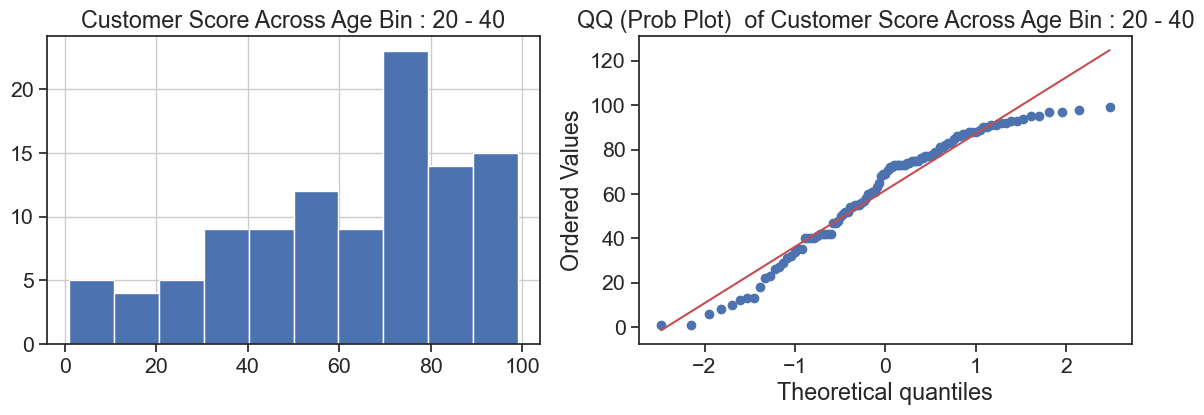

Customer Score Across Age Bin : 40 - 60
Mean is :  33.65886811104704
Variance is : 299.2794817636751
Std D is :  17.299696002059548


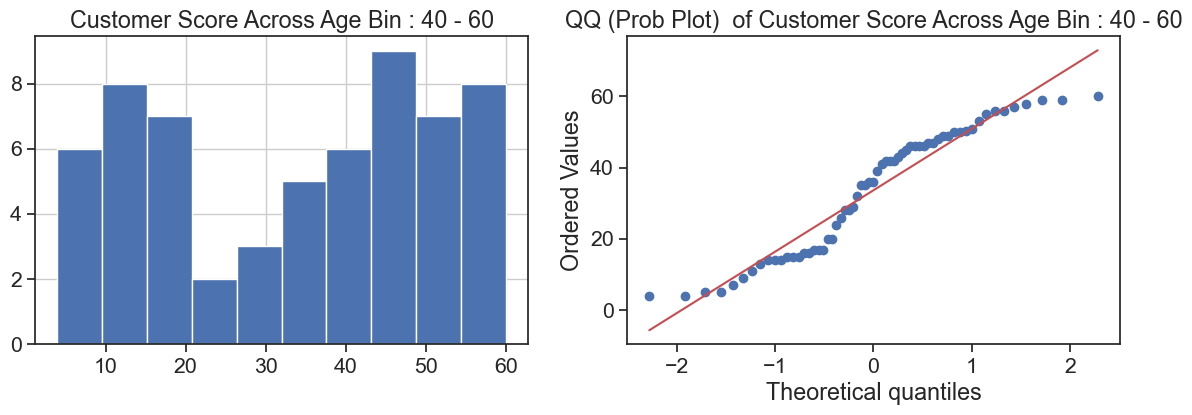

Customer Score Across Age Bin : 60 - 80
Mean is :  44.1764705882353
Variance is : 207.79238754325266
Std D is :  14.41500563798893


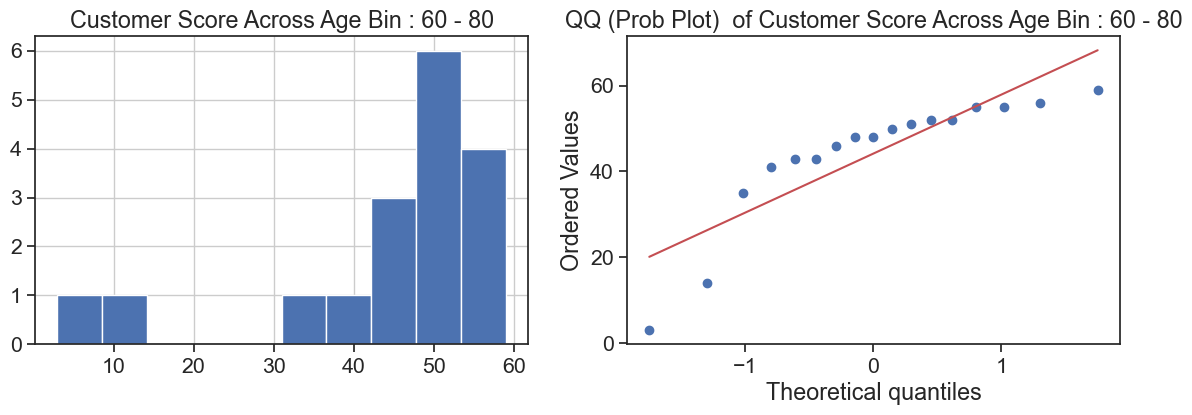

In [35]:
def distributionplot():
    for B in labels:
        title  = f'Customer Score Across Age Bin : {bins[B]} - {bins[B + 1]}'
        print(title)
        feature = df[df['binned_Age'] == B]['CustomerSpendingScore']
        print("Mean is : ",np.mean(feature))
        print(f'Variance is : {np.var(feature)}')
        print("Std D is : ",np.std(feature))

        plt.figure(figsize=(14,4))

        plt.subplot(1,2,1)  #1st plot
    #     displaying the title
        plt.title(title)
        feature.hist()

        plt.subplot(1,2,2)  #2nd plot
        stat.probplot(feature, dist='norm', plot=pylab)
        plt.title("QQ (Prob Plot)  of "+ title)

        plt.show()
distributionplot()


## <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">1 : Checking the Association between Age(Binned) and Customer Spending Score</span>

* **Stating the hypothesis:**

> **H0: The mean customer spending score of all Age groups is equal.**

> **H1: Atleast one of the mean of Age Groups Customer Spending Score differs.**

* **Observed Data contains:**

>  One Variables is Descrete Variable : Bins of Age

>  One Variables is Continous (Numerical) : Customer Score


# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Levene's test : Test for equality of variance</span>

Levene's test is used check the homogeneity of variance or in other words a sample population is normally distributed

In [36]:
# test for equality of variance


# h0:the variances are equal
# h1:the variances are not equal

_,p_value = scipy.stats.levene(
                   df[df['binned_Age']==0]['CustomerSpendingScore'],
                   df[df['binned_Age']==1]['CustomerSpendingScore'],
                   df[df['binned_Age']==2]['CustomerSpendingScore'],
                   df[df['binned_Age']==3]['CustomerSpendingScore'],center='mean')



print(f"p-value for the test:{p_value:.4f}")
if p_value <= 0.05:
    print("Since the p_value < 0.05 we reject the Null hypothesis(h0) & Accept the h1 : the variances are not equal.")
else:
    print("Since the p_value > 0.05 we failed to reject the Null hypothesis(h0) & Reject the h1 : the variances are not equal.")

p-value for the test:0.0004
Since the p_value < 0.05 we reject the Null hypothesis(h0) & Accept the h1 : the variances are not equal.


# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Anova test : Analysis of Variance</span>

In [37]:
f_statistic, p_value = scipy.stats.f_oneway(
    df[df['binned_Age']==0]['CustomerSpendingScore'], 
    df[df['binned_Age']==1]['CustomerSpendingScore'], 
    df[df['binned_Age']==2]['CustomerSpendingScore'],
    df[df['binned_Age']==3]['CustomerSpendingScore'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 20.451958017074784, P-Value: 1.4255601358540475e-11


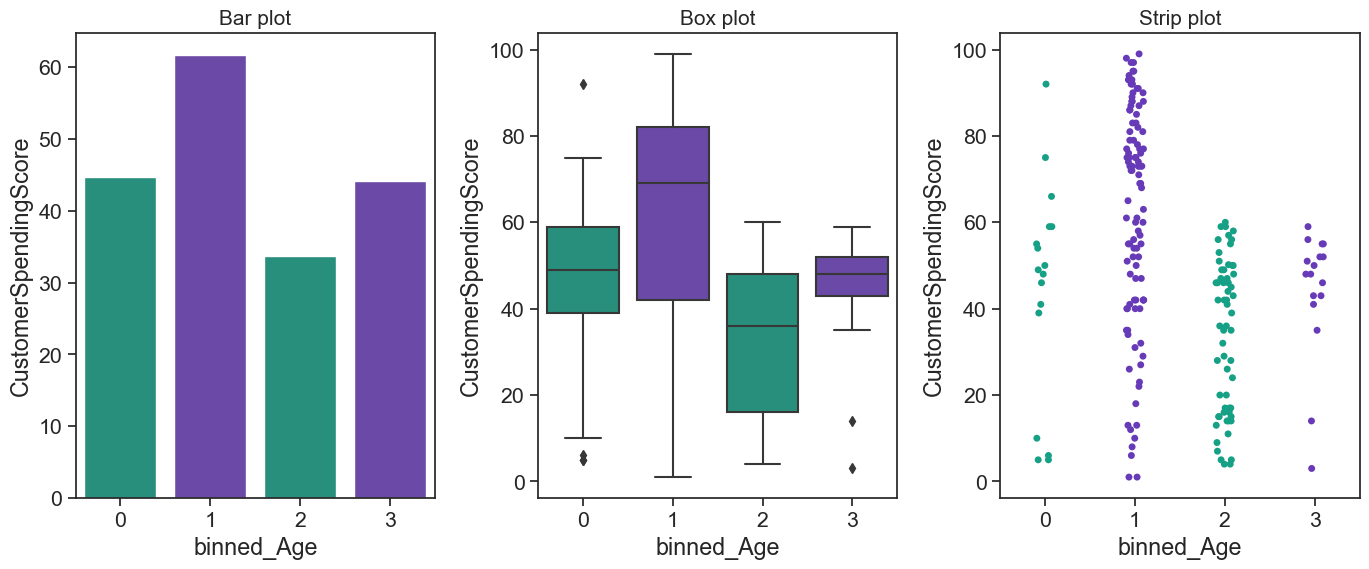

In [38]:
fig=plt.figure(figsize=(14,6))
text="<center><h3><b  style='color:black'>" + f"Association between </b> <b style='color:#800080'> Age(Binned) and Spending Score"+ "</b></h3><hr></center>"
display(HTML(text))

ax=plt.subplot(1,3,1)
temp=df.groupby('binned_Age')['CustomerSpendingScore'].mean().reset_index()
sns.barplot(data=temp,x='binned_Age',y='CustomerSpendingScore',palette=['#16A085','#673AB7']);
plt.title("Bar plot",fontsize=15)

ax=plt.subplot(1,3,2)
sns.boxplot(data=df,x='binned_Age',y='CustomerSpendingScore',palette=['#16A085','#673AB7']);
plt.title("Box plot",fontsize=15)

ax=plt.subplot(1,3,3)
sns.stripplot(data=df,x='binned_Age',y='CustomerSpendingScore',palette=['#16A085','#673AB7']);
plt.title("Strip plot",fontsize=15)

plt.tight_layout()

<h3> <b style='color:#800000;font-size:22px;'>Inference from Levene's Test & One Way Anova Between Customer Score & Age (Bins)  </b>:
    <ul>
        <li>Since the p_value < 0.05 we reject the null hypothesis </li>
        <li>The above visuals strengthens our claim that, Atleast one of the mean of Age Groups Spending Score differs.</li>
    </ul>
    <br>
    we can reject the null hypothesis and conclude that we have sufficient evidence to say that the alternative hypothesis is true : Age groups mean Spending Score differs.
</h3>


## <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">2 : Checking the Association between Age(Binned) and Annual Income</span>

* **Stating the hypothesis:**

> **H0: The mean Annual Income of all Age groups is equal.**

> **H1: At least one to mean Annual Income of Age groups differ.**

# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Levene's test : test for equality of variance</span>

<b> Observed Sample Data contains</b>

>  One Variables is Continous Variable : Bins of Age

>  One Variables is Continous (Numerical) : Annual Income

In [39]:
# test for equality of variance
# h0:the variances are equal
# h1:the variances are not equal

_,p_value=scipy.stats.levene(
                   df[df['binned_Age']==0]['Annual_Income'],
                   df[df['binned_Age']==1]['Annual_Income'],
                   df[df['binned_Age']==2]['Annual_Income'],
                   df[df['binned_Age']==3]['Annual_Income'],
                   center='mean')
print(f"p-value for the levene's test:{p_value:.4f}")
# Since the p_value < 0.05 the variances are not equal.

p-value for the levene's test:0.0030


# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Anova test</span>

<b> Observed Sample Data contains</b>

>  One Variables is Continous Variable : Bins of Age

>  One Variables is Continous (Numerical) : Annual Income

In [40]:
f_statistic, p_value = scipy.stats.f_oneway(
    df[df['binned_Age']==0]['CustomerSpendingScore'], 
    df[df['binned_Age']==1]['CustomerSpendingScore'], 
    df[df['binned_Age']==2]['CustomerSpendingScore'],
    df[df['binned_Age']==3]['CustomerSpendingScore'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 20.451958017074784, P-Value: 1.4255601358540475e-11


<h3> <b style='color:#800000;font-size:22px;'>Inference </b>:
    <ul>
        <li> Since the p_value < 0.05 we reject the null hypothesis.</li>
        <li> Atleast one of the mean of Age Groups Annual Income differs.</li>
    </ul>
</h3>

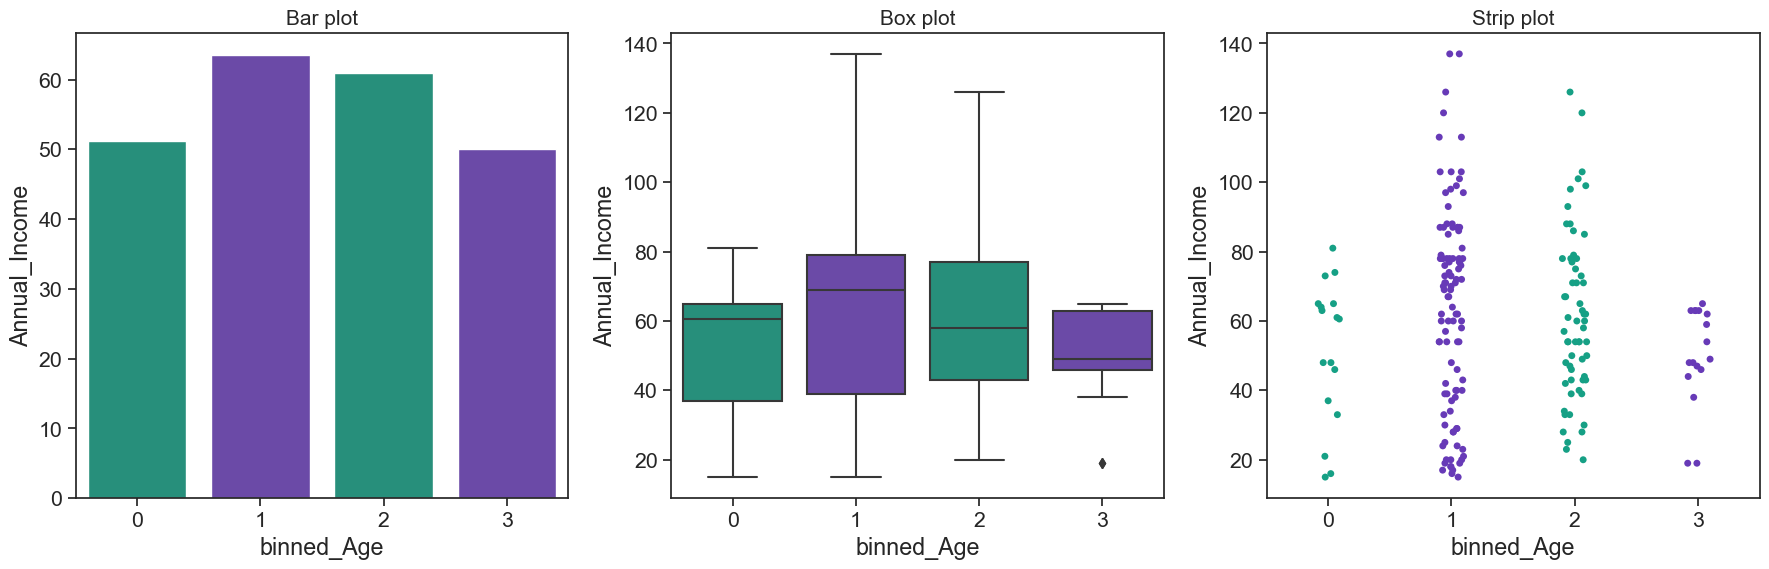

In [41]:
fig=plt.figure(figsize=(18,6))
text="<center><h3><b  style='color:black'>" + f"Association between </b> <b style='color:#800080'> Age(Binned) and Annual Income"+ "</b></h3><hr></center>"
display(HTML(text))
ax=plt.subplot(1,3,1)
temp=df.groupby('binned_Age')['Annual_Income'].mean().reset_index()
sns.barplot(data=temp,x='binned_Age',y='Annual_Income',palette=['#16A085','#673AB7']);
plt.title("Bar plot",fontsize=15)
ax=plt.subplot(1,3,2)
sns.boxplot(data=df,x='binned_Age',y='Annual_Income',palette=['#16A085','#673AB7']);
plt.title("Box plot",fontsize=15)

ax=plt.subplot(1,3,3)
sns.stripplot(data=df,x='binned_Age',y='Annual_Income',palette=['#16A085','#673AB7']);
plt.title("Strip plot",fontsize=15)
plt.tight_layout()

<h3> <b style='color:#800000;font-size:22px;'>Inference </b>:
    <ul>
    <li>The above visuals strengthens our claim that Age groups mean Annual Income differs.</li>
    </ul>
</h3>

# <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Modelling-KMeans</span>


<h3> <b style='color:#800000;font-size:22px;'>Note </b>:
    <ul>
    <li>We can consider any number of features as an input to the Clustering Algorithm but to visualize the results at most I can consider only three features.</li><br>
    <li>Gender is the least important feature here as per the statistical tests performed so I'm not considering it.
    </ul>
</h3>

In [42]:
# assigning the features to be considered to variable 'X' , # subset with numeric variables only
X_kmeans_features = df.iloc[:,3:]
X_kmeans_features

Annual_Income  CustomerSpendingScore binned_Age
0             15.0                   39.0          0
1             15.0                   81.0          1
2             16.0                    6.0          0
3             16.0                   77.0          1
4             17.0                   40.0          1
..             ...                    ...        ...
195          120.0                   79.0          1
196          126.0                   28.0          2
197          126.0                   74.0          1
198          137.0                   18.0          1
199          137.0                   83.0          1

[200 rows x 3 columns]

## <span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Determining optimum value of K using the Elbow Method</span>

* **k is the parameter of KMeans Algorithm which instructs it how many clusters are needed to be formed of the given data.**

* **init = 'k-means++' ensures that initial clusters are choosen smartly and not randomly which increases the chances of convergence.**


In [43]:
wcss=[]
for i in range(1,15):
    k_means=KMeans(n_clusters=i,init='k-means++',max_iter=500)
    k_means.fit(X_kmeans_features)
    wcss.append(k_means.inertia_)

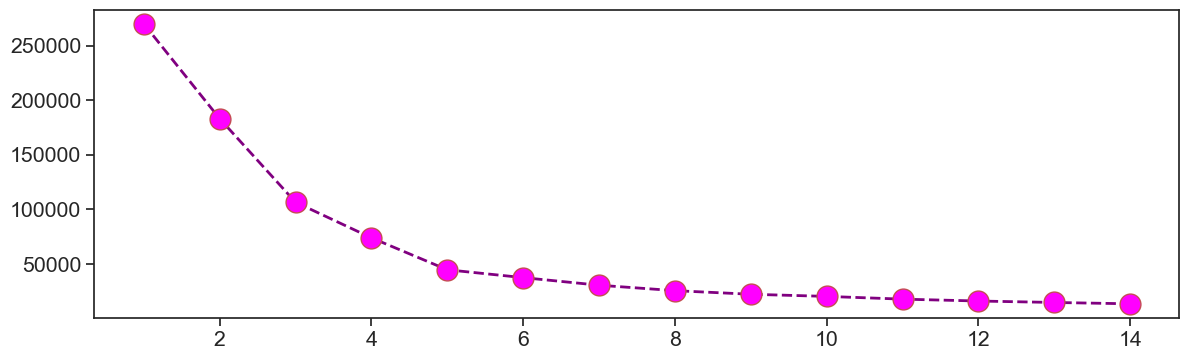

In [44]:
plt.figure(figsize=(14,4))
plt.plot(np.arange(1,15,1),wcss,marker='o',ms=15,c='#800080',lw=2,mfc='#FF00FF',mec='r',linestyle='dashed');

<h3> <b style='color:#800000;font-size:22px;'>Inference </b>:
    <ul>
    <li>We observe that after k=5 the inertia or basically mean sum of squared difference of each point in a cluster from its cluster center decreases at a lower rate.</li><br>
     <li> k=5 acts like the elbow and this value gives us a good balance between number of clusters to form and inertia.</li>
    </ul>
</h3>

<span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">K Means with k=5</span>


In [45]:
k_means = KMeans(n_clusters=5,init='k-means++',max_iter=500)
y_kmeans = k_means.fit_predict(X_kmeans_features)
X_kmeans_features['Cluster'] = y_kmeans

In [46]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['binned_Age'],
        y = db[db['Cluster']==n]['CustomerSpendingScore'],
        z = db[db['Cluster']==n]['Annual_Income'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 7
        ),
        opacity = 0.7
     )

trace0 = tracer(X_kmeans_features, 0, 'Cluster 0')
trace1 = tracer(X_kmeans_features, 1, 'Cluster 1')
trace2 = tracer(X_kmeans_features, 2, 'Cluster 2')
trace3 = tracer(X_kmeans_features, 3, 'Cluster 3')
trace4 = tracer(X_kmeans_features, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'X: Age'),
            yaxis = dict(title = 'Y: Spending Score'),
            zaxis = dict(title = 'Z: Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

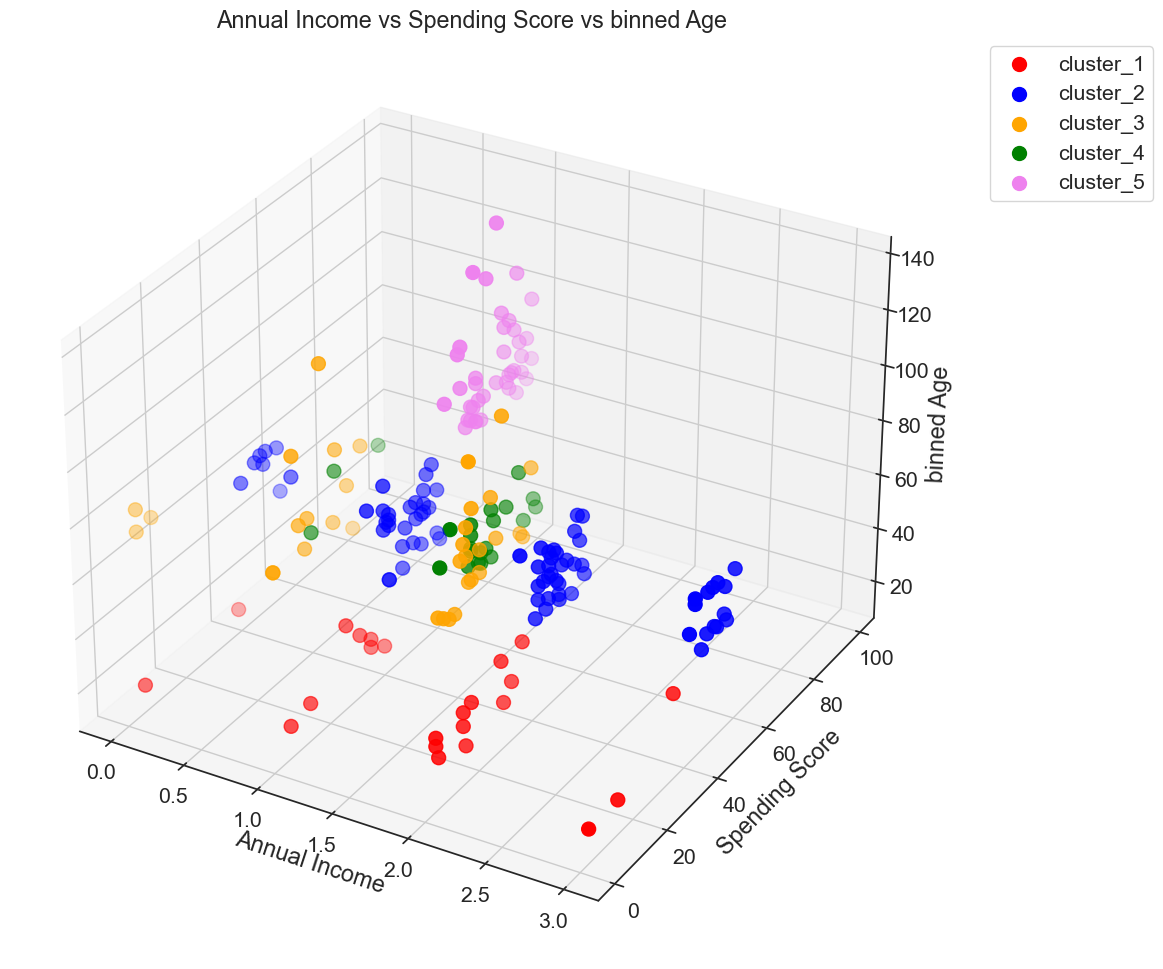

In [47]:
# %matplotlib widget
# sns.set(style = "darkgrid")
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.set_zlabel("binned Age")
ax.set_title("Annual Income vs Spending Score vs binned Age")
ClusterNo = np.unique(X_kmeans_features.Cluster.values)
colorclusters = ['red','blue','orange','green','violet']
plotdict = dict(zip(ClusterNo,colorclusters))
for cluster in plotdict.keys():
    clustername = "cluster_" + str(cluster+1)
    ax.scatter(
        X_kmeans_features[X_kmeans_features['Cluster']==cluster]['binned_Age'],
        X_kmeans_features[X_kmeans_features['Cluster']==cluster]['CustomerSpendingScore'],
        X_kmeans_features[X_kmeans_features['Cluster']==cluster]['Annual_Income'],
        s=100,
        color= plotdict[cluster],
        label=clustername)
plt.legend(bbox_to_anchor=(1.25,1.0));
plt.tight_layout()
plt.show()

<span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Visualizing the Clusters in 3d</span>


<h3> <b style='color:#800000;font-size:22px;'>Inference </b>:
    <ul>
    <li>We observe that Annual Income vs Spending plot gives the best representation of the clusters formed.</li><br>
     <li> The green group includes the customers who although having lower Income tend to spend high percentage of it.</li><br>
        <li> Customers belonging to the red ,violet and orange tend to follow a linear relationship between Annual Income and Spend which is what we usually expect.</li><br>
      <li>The blue group represents the customers who although having Annual Income on the high side tend to spend less and this is the group that needs to be especially targeted with special policies so as to entice them to spend more.</li>
    </ul>
</h3>

<span style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #800080;padding:0px 20px">Linear Regression</span>

Customer Score is the interest goal which is a target variable or reponse variable acting as a dependent variable
&
other features like Age,Annual Income of the customer is independent variable. Our Goal is to find the best regressior where the prediction of the customer score can be calculated.

<b>Step1: Import packages</b>

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set(color_codes = True)

<b>Step2 :  Load our data</b>

In [49]:
df.head()

CustomerID  Gender  Age  Annual_Income  CustomerSpendingScore binned_Age
0           1    Male   19           15.0                   39.0          0
1           2    Male   21           15.0                   81.0          1
2           3  Female   20           16.0                    6.0          0
3           4  Female   23           16.0                   77.0          1
4           5  Female   31           17.0                   40.0          1

<b> Step3: Feature Engineering - transforming variables as appropriate for inputs to Machine Learning Algorithm <b>
#### Transforming categorical variable Gender using One hot encodding

In [50]:
gender_onhot = pd.get_dummies(df['Gender'])
gender_onhot.tail()

Female  Male
195       1     0
196       1     0
197       0     1
198       0     1
199       0     1

<b>Create input dataset aka X</b>

In [51]:
X = pd.merge(df[['Age','Annual_Income']], gender_onhot, left_index=True, right_index=True)
X.head(n = 20)

Age  Annual_Income  Female  Male
0    19           15.0       0     1
1    21           15.0       0     1
2    20           16.0       1     0
3    23           16.0       1     0
4    31           17.0       1     0
5    22           17.0       1     0
6    35           18.0       1     0
7    23           18.0       1     0
8    64           19.0       0     1
9    30           19.0       1     0
10   67           19.0       0     1
11   35           19.0       1     0
12   58           20.0       1     0
13   24           20.0       1     0
14   37           20.0       0     1
15   22           20.0       0     1
16   35           21.0       1     0
17   20           21.0       0     1
18   52           23.0       0     1
19   35           23.0       1     0

<AxesSubplot:>

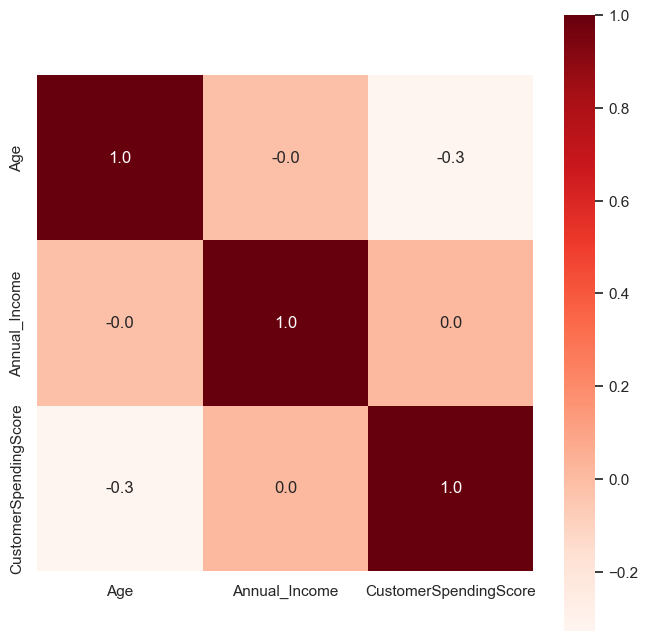

In [52]:
# We can use a heatmap to check correlation between the variables.

corr = df.drop(columns='CustomerID',axis=1).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

Correlation between variables.........


Age  Annual_Income    Female      Male
Age            1.000000      -0.012846 -0.060867  0.060867
Annual_Income -0.012846       1.000000 -0.056748  0.056748
Female        -0.060867      -0.056748  1.000000 -1.000000
Male           0.060867       0.056748 -1.000000  1.000000

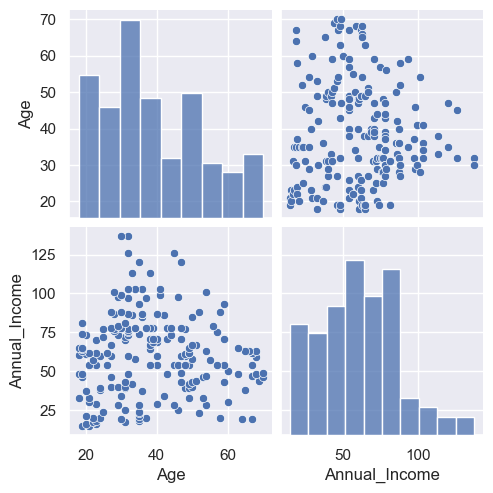

In [53]:
sns.pairplot(X[['Age','Annual_Income']])
print("Correlation between variables.........")
X.iloc[:,:4].corr()

<b>Create target variable or dependent variable.<b>

In [54]:
Y = df['CustomerSpendingScore']
Y.head()

0    39.0
1    81.0
2     6.0
3    77.0
4    40.0
Name: CustomerSpendingScore, dtype: float64

<b>Step4: Split data in train & test set<b>

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state = 40)
print('Shape of Training Xs:{}'.format(X_train.shape))
print('Shape of Test Xs:{}'.format(X_test.shape))

Shape of Training Xs:(160, 4)
Shape of Test Xs:(40, 4)


In [56]:
X_test.head(n=10)

Age  Annual_Income  Female  Male
96    47           60.0       1     0
5     22           17.0       1     0
116   63           65.0       1     0
35    21           33.0       1     0
183   29           98.0       1     0
160   56           79.0       1     0
54    50           43.0       1     0
134   20           73.0       0     1
90    68           59.0       1     0
191   32          103.0       1     0

<b>Step5: Build Linear Regression Analysis & XG Boost Model<b>

In [57]:
# ----------> initializing linear regression & XGBoost model
LR_model = LinearRegression() 
XG_model = XGBRegressor()

# ----------> Now we need to train the  linear regression XGBoost model  (fitting means training)
LR_model.fit(X_train,y_train) 
XG_model.fit(X_train,y_train) 

y_test_predicted_LR = LR_model.predict(X_test)
y_test_predicted_XG = XG_model.predict(X_test)

LRscore = LR_model.score(X_test,y_test);  #testing the linear regression model
XGscore = XG_model.score(X_test,y_test);  #testing the linear regression model

<AxesSubplot:xlabel='CustomerSpendingScore'>

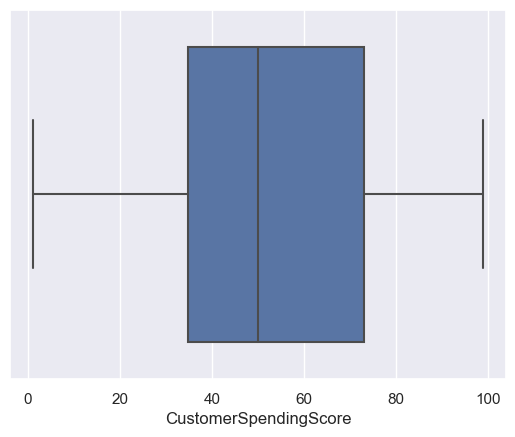

In [58]:
sns.boxplot(x = df['CustomerSpendingScore'])

<AxesSubplot:xlabel='CustomerSpendingScore', ylabel='Density'>

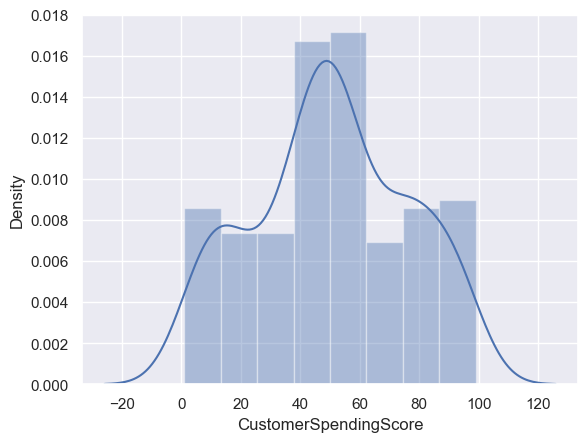

In [59]:
sns.distplot(df['CustomerSpendingScore'])

<b>Step6: Check Accuracy of Model<b>

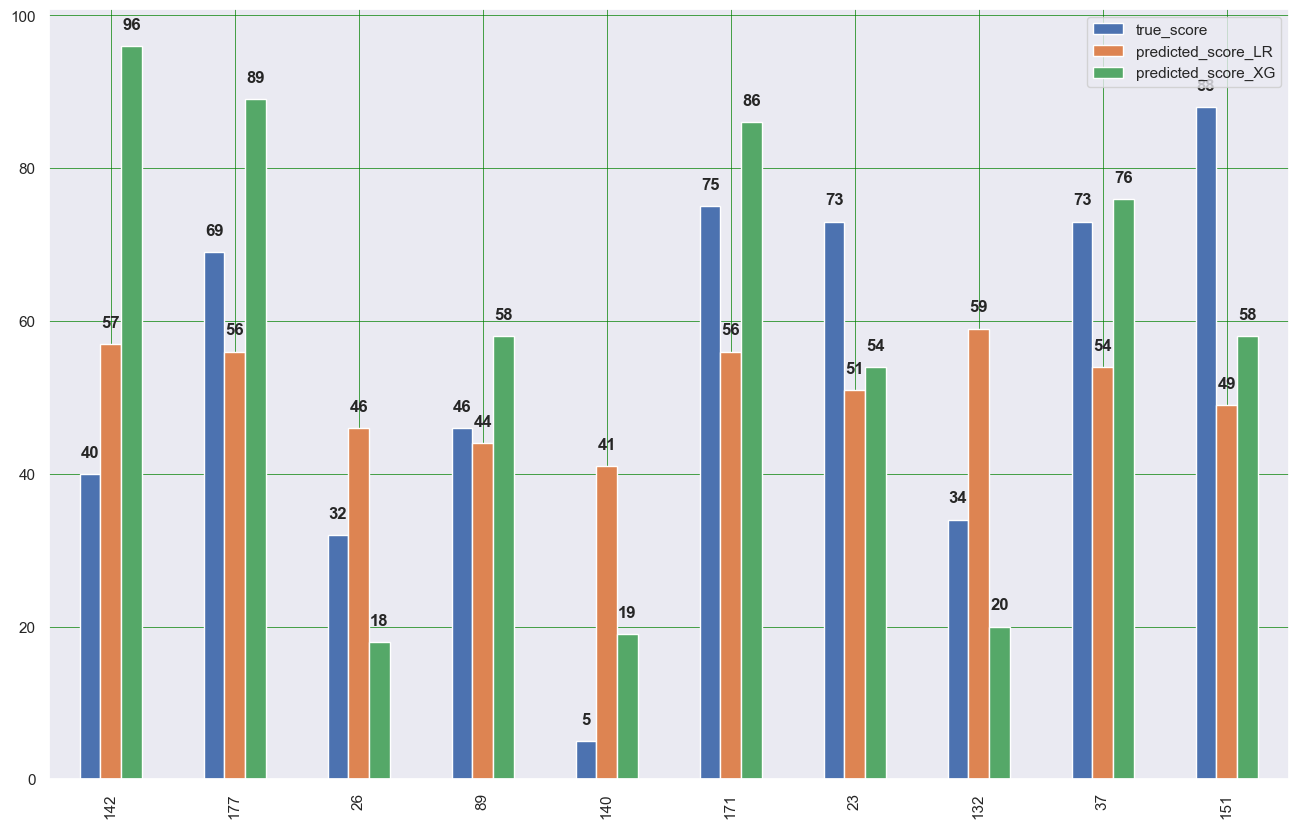

In [60]:
df_new = pd.DataFrame({
    "true_score" : y_test,
    "predicted_score_LR" : y_test_predicted_LR.flatten(),
    "predicted_score_XG" : y_test_predicted_XG
})

from numpy import random

x = random.randint(len(df_new) - 10)

df_plot = df_new[x:x+10]
df_plot = df_plot.astype('int')
ax = df_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.bar_label(ax.containers[0],fontweight='bold',padding = 10)
ax.bar_label(ax.containers[1],fontweight='bold',padding = 10)
ax.bar_label(ax.containers[2],fontweight='bold',padding = 10)
plt.show()

<b>Step7: Diagnostic analysis<b>

In [61]:
print("Intercept is at: %.2f"%(LR_model.intercept_))

# The coefficients
print(f'Coefficients: {LR_model.coef_}')

# The mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_test_predicted_LR))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % metrics.r2_score(y_test, y_test_predicted_LR))

Intercept is at: 69.27
Coefficients: [-0.57043524  0.04724205  1.09231299 -1.09231299]
Mean squared error: 499.05
Variance score: 0.1323


Interpretation
Score: R^2 (pronounced as R Square) it is also called as coefficient of determination of prediction.

Range of Score values: 0 to 1 , 0 -> No relation between predicted Y and input Xs, 1 -> best case scenario where predicted value is same as actual value.

Formula for Score: R^2 = (1 - u/v),

where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and

v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()

In [62]:
# Now we use R squared error (Basically comparing the original y_train and predictions and seeing difference/error)

# For XGBRegressor
regressorsR2Score = {
    'RSQscoreXGB' : metrics.r2_score(y_test,y_test_predicted_XG),
    'RSQscoreLR' : metrics.r2_score(y_test,y_test_predicted_LR)
}

# Let's check

# The closer the errors are to 0, the more accurate our model is.
for r2 in regressorsR2Score:
    print(f"R squared error for {r2} Regressor: {round(regressorsR2Score[r2],2)}")

R squared error for RSQscoreXGB Regressor: 0.22
R squared error for RSQscoreLR Regressor: 0.13


<h3> <b style='color:#800000;font-size:22px;'>Inference </b>:
    <ul>
        <li>Clearly, XG Boost regressor is a better model for our project as it's R squared error is closer to 1.</li><br>
    <li>Perhaps, R-Square is 22% which represents regressior only adjusting customer score to the independent variable like Age, Annual Income, eventually Not a strong prediction of the Response</li><br>
    </ul>
</h3>

<p style="background-color:#008080;color:white;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;">Thank you 😊 !!!!!!!!!!!</p>
